In [1]:
import os
import json
import music21
import numpy as np
import pandas as pd
from itertools import groupby
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Loading Data

In [ ]:
def extract_chords_from_midi(midi_path):
    """
    Extracts chord progressions from a MIDI file using music21.
    """
    chords = []
    try:
        midi_data = music21.converter.parse(midi_path)
    except:
        return chords  # Return empty list if parsing fails

    faulty_labels = ["I1", "I11", "I3", "I5", "I7", "P10", "P6", "P9", "R12", "R4", "R6", "R8", "RI1", "RI11", "RI5", "RI7", "RI9"]
    for part in midi_data.parts:  # Iterate through different instruments
        for element in part.flat.notes:
            if isinstance(element, music21.chord.Chord):
                if "multiple octaves above" not in element.pitchedCommonName and element.pitchedCommonName.strip() not in faulty_labels:
                    notes = [n.nameWithOctave for n in element.pitches]
                    chord = {element.pitchedCommonName: notes}
                    chords.append(chord)  # Extract chord name
                    
    return chords

def load_dataset(folder_path):
    """
    Load all MIDI files and extract chords
    """
    
    with open("../App/backend/chords_data.json", "r") as f:
        all_chords = json.loads(f.read())
        
    i = 0
    for artist_folder in sorted(os.listdir(folder_path)):
        artist_path = os.path.join(folder_path, artist_folder)
        print('\n' + artist_path)
        if os.path.isdir(artist_path):  # Make sure it's a folder
            for file in sorted(os.listdir(artist_path)):
                i += 1
                print(f"{i}: {file}")
                if i < 12500 or i in [1672, 2123, 5557, 12125]:
                    continue
                
                if i % 500 == 0:
                    # Save data to file as JSON
                    with open("chords_data.json", "w") as f:
                        json.dump(all_chords, f, indent=4)
                        
                if file.endswith(".mid") or file.endswith(".midi"):
                    midi_path = os.path.join(artist_path, file)
                    chords = extract_chords_from_midi(midi_path)
                    all_chords.extend(chords)

    # Save data to file as JSON
    with open("../App/backend/chords_data.json", "w") as f:
        json.dump(all_chords, f, indent=4)

dataset_folder = "archive"
load_dataset(dataset_folder)


archive/.38 Special
1: Caught Up In You.mid
2: Fantasy Girl.mid

archive/.DS_Store

archive/.gitattributes

archive/10,000_Maniacs
3: A_Campfire_Song.mid

archive/101_Strings
4: Theme_From_The_Godfather.mid

archive/10cc
5: Dreadlock_Holiday.1.mid
6: Dreadlock_Holiday.2.mid
7: Dreadlock_Holiday.3.mid
8: Dreadlock_Holiday.4.mid
9: Dreadlock_Holiday.mid
10: Im_Not_In_Love.1.mid
11: Im_Not_In_Love.2.mid
12: Im_Not_In_Love.3.mid
13: Im_Not_In_Love.mid
14: The_Things_We_Do_for_Love.mid

archive/1910_Fruitgum_Company
15: Simon_Says.1.mid
16: Simon_Says.mid

archive/20_Fingers
17: Lick_It.mid
18: Short_Dick_Man.mid

archive/2Boys
19: I_Wont_Let_You_Down.mid

archive/2_Brothers_on_the_4th_Floor
20: Come_Take_My_Hand.mid
21: Dreams.1.mid
22: Dreams.mid
23: Let_Me_Be_Free.mid
24: Never_Alone.1.mid
25: Never_Alone.mid

archive/2_Unlimited
26: Get_Ready_for_This.mid
27: Here_I_Go.mid
28: Let_the_Beat_Control_Your_Body.1.mid
29: Let_the_Beat_Control_Your_Body.2.mid
30: Let_the_Beat_Control_Your_Bo

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/music21/midi/translate.py:863: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=6, channel=None, data=b'fl\x84che  '>; getting generic Instrument
  warnings.warn(


12246: Sha-e-o.1.mid
12247: Sha-e-o.mid

archive/Ron
12248: Ferite_e_lacrime_You_.1.mid
12249: Ferite_e_lacrime_You_.mid
12250: Il_sole_e_la_luna.1.mid
12251: Il_sole_e_la_luna.mid
12252: Joe_temerario.mid
12253: Mi_hai_preso_il_cuore.mid
12254: Non_abbiam_bisogno_di_parole.1.mid
12255: Non_abbiam_bisogno_di_parole.mid
12256: Piazza_Grande.mid
12257: Return_My_Love.mid
12258: Sono_uguale_a_te.mid
12259: Stella_mia.mid
12260: Tutti_quanti_abbiamo_un_angelo.1.mid
12261: Tutti_quanti_abbiamo_un_angelo.mid
12262: Un_porto_nel_vento.mid
12263: Una_Citta_Per_Cantare.1.mid
12264: Una_Citta_Per_Cantare.mid
12265: Vorrei_incontrarti_fra_centanni_con_la_partecipazione_di_Tosca_.1.mid
12266: Vorrei_incontrarti_fra_centanni_con_la_partecipazione_di_Tosca_.mid

archive/Ronan_Keating
12267: When_You_Say_Nothing_At_All.mid

archive/Ronnie_Spector
12268: Take_Me_Home_Tonight.mid

archive/Ronny_Jordan
12269: So_What.mid

archive/Roots_Syndicate
12270: Mockin_Bird_Hill.mid

archive/Rory_Block
12271: Lov

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/music21/midi/translate.py:863: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent INSTRUMENT_NAME, track=3, channel=None, data=b'\x00\x88\x1c\xff\x05\x07won\xb4t \x00\x81@\xff\x05\x05you \x00\x81@\xff\x05\x08pardon \x00'>; getting generic Instrument
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/music21/midi/translate.py:863: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent INSTRUMENT_NAME, track=3, channel=None, data=b'\x00\x82|$^\x04$\x00\x82|$W\x04$\x00\x82|$Y\x04$\x00\x82|$c\x04$\x00\x82|$b\x04$\x00'>; getting generic Instrument
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/music21/midi/translate.py:863: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent INSTRUMENT_NAME, track=3, channel=None, data=b'\x00\x82|$j\x04$\x00\x82|$c\

12499: Oh_Pretty_Woman.3.mid
12500: Oh_Pretty_Woman.4.mid
12501: Oh_Pretty_Woman.5.mid
12502: Oh_Pretty_Woman.mid
12503: Only_The_Lonely.1.mid
12504: Only_The_Lonely.2.mid
12505: Only_The_Lonely.mid
12506: You_Got_It.mid

archive/Rozalla
12507: Are_You_Ready_to_Fly.mid
12508: Everybodys_Free.mid
12509: Everybodys_Free_To_Feel_Good_.mid

archive/Ruby_and_The_Romantics
12510: Our_Day_Will_Come.mid

archive/Rudi_Carrell
12511: Wann_wirds_mal_wieder_richtig_Sommer.mid

archive/Rufus
12512: At_Midnight_My_Love_Will_Lift_You_Up_.mid

archive/Rufus_Thomas
12513: Barefootin.mid
12514: Walkin_the_Dog.mid

archive/Ruggeri
12515: Anna_e_il_freddo_che_ha.mid
12516: Canta_ancora_per_me.mid
12517: I_dubbi_dellamore.mid
12518: Il_mare_dinverno.mid
12519: Il_portiere_di_notte.1.mid
12520: Il_portiere_di_notte.mid
12521: Lamore_e_un_attimo.1.mid
12522: Lamore_e_un_attimo.mid
12523: Mistero.1.mid
12524: Mistero.mid
12525: Neve_al_sole.mid
12526: Nino_no.mid
12527: Non_piango_piu.mid
12528: Nuovo_swing.1

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/music21/midi/translate.py:863: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=3, channel=None, data=b'Remix\xe9'>; getting generic Instrument
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/music21/midi/translate.py:863: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=4, channel=None, data=b'Remix\xe9'>; getting generic Instrument
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/music21/midi/translate.py:863: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=5, channel=None, data=b'Remix\xe9'>; getting generic Instrument
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/music21/midi/translate.py:863: Transl

12676: Cest_ma_vie.mid
12677: Les_Filles_du_bord_de_mer.1.mid
12678: Les_Filles_du_bord_de_mer.mid
12679: Sans_toi,_ma_mie.mid
12680: Une_larme_aux_nuages.mid
12681: Une_meche_de_cheveux.1.mid
12682: Une_meche_de_cheveux.mid
12683: Vous_permettez_Monsieur_.mid

archive/Sam_Brown
12684: Stop.mid

archive/Sam_Cooke
12685: Another_Saturday_Night.mid
12686: Cupid.mid
12687: Twistin_the_Night_Away.mid
12688: Twisting_the_Night_Away.mid
12689: What_a_Wonderful_World.mid
12690: You_Send_Me.mid

archive/Sam_The_Sham
12691: Wooly_Bully.mid

archive/Sam_and_Dave
12692: Aint_That_a_Lot_of_Love.mid
12693: Hold_On_Im_Coming_.1.mid
12694: Hold_On_Im_Coming_.mid
12695: I_Thank_You.mid
12696: Soul_Man.1.mid
12697: Soul_Man.mid

archive/Sam_the_Sham_and_The_Pharaohs
12698: Wooly_Bully.mid

archive/Sammy_Davis,_Jr.
12699: What_Kind_of_Fool_Am_I.mid

archive/Sammy_Hagar
12700: I_Cant_Drive_55.mid

archive/Sammy_Nestico
12701: Pressure_Cooker.mid

archive/Sandie_Shaw
12702: Those_Were_the_Days.mid

archiv

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/music21/midi/translate.py:863: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=0, channel=None, data=b'ABSDRAKT \xa9'>; getting generic Instrument
  warnings.warn(


12890: It_Wasnt_Me.mid

archive/Shakatak
12891: Easier_Said_Than_Done.1.mid
12892: Easier_Said_Than_Done.mid
12893: Night_Birds.1.mid
12894: Night_Birds.mid
12895: The_Christmas_Song.mid

archive/Shalom
12896: Az_jednou.mid

archive/Shania_Twain
12897: Any_Man_of_Mine.mid
12898: Black_Eyes,_Blue_Tears.mid
12899: From_This_Moment_On.1.mid
12900: From_This_Moment_On.2.mid
12901: From_This_Moment_On.mid
12902: Honey,_Im_Home.mid
12903: Im_Gonna_Getcha_Good.mid
12904: Ka-Ching.mid
12905: Love_Gets_Me_Every_Time.mid
12906: Man_I_Feel_Like_a_Woman.mid
12907: When.mid
12908: Youre_Still_the_One.mid

archive/Shanice
12909: I_Love_Your_Smile.1.mid
12910: I_Love_Your_Smile.mid

archive/Sharpe
12911: Rama_Lama_Ding_Dong.mid

archive/Shaun_Cassidy
12912: Da_Doo_Ron_Ron.mid

archive/Shawn_Colvin
12913: Sunny_Came_Home.mid

archive/Shawn_Mullins
12914: Lullaby.mid

archive/Shearing_George
12915: Beautiful_Love.mid
12916: Ellington_Medley_Cotton_Tail_I_Didnt_Know_About_You_Dont_Get_Around_Much_Anymor

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/music21/midi/translate.py:863: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=4, channel=None, data=b'\xff Sequenced 1997 by'>; getting generic Instrument
  warnings.warn(


12961: Late_In_The_Evening.mid
12962: Loves_Me_Like_a_Rock.mid
12963: Me_and_Julio_Down_by_the_School_Yard.mid


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/music21/midi/translate.py:863: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=3, channel=None, data=b'\xff 1997 Sequenced'>; getting generic Instrument
  warnings.warn(


12964: Mother_and_Child_Reunion.mid
12965: You_Can_Call_Me_Al.1.mid
12966: You_Can_Call_Me_Al.mid

archive/Simon_and_Garfunkel
12967: A_Hazy_Shade_of_Winter.mid
12968: At_the_Zoo.mid
12969: Bridge_Over_Toubled_Water.1.mid
12970: Bridge_Over_Toubled_Water.2.mid
12971: Bridge_Over_Toubled_Water.mid
12972: Bridge_Over_Troubled_Water.1.mid
12973: Bridge_Over_Troubled_Water.2.mid
12974: Bridge_Over_Troubled_Water.3.mid
12975: Bridge_Over_Troubled_Water.mid
12976: Bye_Bye_Love.mid
12977: Cecilia.mid
12978: El_Condor_Pasa.1.mid
12979: El_Condor_Pasa.mid
12980: I_Am_a_Rock.mid
12981: Le_Laureat_Mrs._Robinson.1.mid
12982: Le_Laureat_Mrs._Robinson.2.mid
12983: Le_Laureat_Mrs._Robinson.3.mid
12984: Le_Laureat_Mrs._Robinson.4.mid
12985: Le_Laureat_Mrs._Robinson.5.mid
12986: Le_Laureat_Mrs._Robinson.mid
12987: Old_Friends.mid
12988: Scarborough_Fair.1.mid
12989: Scarborough_Fair.mid
12990: The_59th_Street_Bridge_Song.mid
12991: The_Boxer.1.mid
12992: The_Boxer.mid
12993: The_Sound_of_Silence.1.mid


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/music21/midi/translate.py:863: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=14, channel=None, data=b'MORE MIDI\xb4S'>; getting generic Instrument
  warnings.warn(



archive/Skid_Row
13095: I_Remember_You.mid

archive/Skylark
13096: Wildflower.mid

archive/Slipstream
13097: Computer_Love.mid

archive/Sly
13098: Dance_to_the_Music.mid
13099: Everyday_People.mid
13100: Family_Affair.mid

archive/Sly_and_The_Family_Stone
13101: Dance_to_the_Music.1.mid
13102: Dance_to_the_Music.mid
13103: Everyday_People.mid
13104: Family_Affair.1.mid
13105: Family_Affair.mid
13106: I_Want_to_Take_You_Higher.mid

archive/Small_Faces
13107: Itchycoo_Park.mid
13108: Sha-La-La-La-Lee.mid

archive/Smash_Mouth
13109: All_Star.1.mid
13110: All_Star.mid
13111: Cant_Get_Enough_of_You_Baby.mid
13112: Im_a_Believer.1.mid
13113: Im_a_Believer.mid
13114: The_Fonz.mid
13115: Then_the_Morning_Comes.mid
13116: Walkin_on_the_Sun.1.mid
13117: Walkin_on_the_Sun.2.mid
13118: Walkin_on_the_Sun.3.mid
13119: Walkin_on_the_Sun.mid

archive/Smokey_Robinson
13120: Being_With_You.mid
13121: I_Second_That_Emotion.mid
13122: Tracks_of_My_Tears.mid

archive/Smokie
13123: Babe_Its_Up_to_You.mid
1

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/music21/midi/translate.py:863: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=13, channel=None, data=b'\xa91995 Holland'>; getting generic Instrument
  warnings.warn(



archive/Stephen_Bishop
13363: It_Might_Be_You_Theme_From_Tootsie_.1.mid
13364: It_Might_Be_You_Theme_From_Tootsie_.mid
13365: On_and_On.mid

archive/Steppenwolf
13366: Born_To_Be_Wild.1.mid
13367: Born_To_Be_Wild.2.mid
13368: Born_To_Be_Wild.3.mid
13369: Born_To_Be_Wild.4.mid
13370: Born_To_Be_Wild.mid
13371: Magic_Carpet_Ride.mid
13372: Rock_Me.mid

archive/Steps_Ahead
13373: Pools.mid

archive/Stern_Mike
13374: Scuffle.mid

archive/Steve_Allen
13375: Love_Is_in_the_Air.mid

archive/Steve_Miller_Band
13376: Abracadabra.1.mid
13377: Abracadabra.2.mid
13378: Abracadabra.3.mid
13379: Abracadabra.4.mid
13380: Abracadabra.mid
13381: Fly_Like_an_Eagle.1.mid
13382: Fly_Like_an_Eagle.2.mid
13383: Fly_Like_an_Eagle.mid
13384: Going_to_Mexico.mid
13385: Going_to_the_Country.mid
13386: Jet_Airliner.1.mid
13387: Jet_Airliner.mid
13388: Living_in_the_U.S.A..mid
13389: Living_in_the_U_S_A.mid
13390: Rock_n_Me.mid
13391: Rockn_Me.mid
13392: Space_Cowboy.mid
13393: Take_the_Money_and_Run.1.mid
13394

In [3]:
# Load JSON data
with open("../App/backend/chords_data.json", "r") as f:
    chords = json.load(f)
    print([c for c in chords[:3]])

[{'C#-minor triad': ['G#4', 'E4', 'C#4']}, {'enharmonic equivalent to major triad above Eb': ['F#4', 'E-4', 'B4']}, {'A-major triad': ['A4', 'C#4', 'E4']}]


In [7]:
# Get set of unique chords

print(len(chords))
unique_set = set()
unique_list = []

for chord in chords:
    # Convert dictionary to a tuple of (key, tuple of values)
    key, values = list(chord.items())[0]
    chord_tuple = (key, tuple(values))  

    if chord_tuple not in unique_set:
        unique_set.add(chord_tuple)
        unique_list.append(chord)
print(len(unique_list))

260965
260965


In [8]:
with open("../App/backend/chords_set.json", "w") as f:
    json.dump(chords, f, indent=4)

In [18]:
# Save updated data to JSON file
with open("../App/backend/chords_data.json", "w") as f:
    json.dump(chords, f, indent=4)

# EDA

In [2]:
#with open("../../chords_data.json", "r") as f:
with open("../../chords_data.json", "r") as f:
    chords = json.load(f)
    print(len(chords))
    pitches = [list(c.values())[0] for c in chords]
    chords = [list(c.keys())[0] for c in chords]
    chords = [key for key, _ in groupby(chords)]
    print(len(chords))
    print([c for c in chords[:3]])

1445969
1377412
['C#-minor triad', 'enharmonic equivalent to major triad above Eb', 'A-major triad']


In [3]:
df = pd.DataFrame({'chords':chords})
print(df.head())
print(df.info())

                                          chords
0                                 C#-minor triad
1  enharmonic equivalent to major triad above Eb
2                                  A-major triad
3                                 C#-minor triad
4  enharmonic equivalent to major triad above Eb
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1377412 entries, 0 to 1377411
Data columns (total 1 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   chords  1377412 non-null  object
dtypes: object(1)
memory usage: 10.5+ MB
None


In [4]:
df.describe()

,chords
count,1377412
unique,2715
top,G-major triad
freq,73344


In [5]:
# Count unique chords
unique_chords = df['chords'].nunique()
print(f"Unique chords: {unique_chords}")

# Top 20 most common chords
chord_counts = df['chords'].value_counts()
print(chord_counts.head(20))

Unique chords: 2715
chords
G-major triad                                    73344
C-major triad                                    66804
D-major triad                                    57009
A-major triad                                    53846
F-major triad                                    49716
E-major triad                                    37337
Bb-major triad                                   36660
A-minor triad                                    29151
E-minor triad                                    24620
Eb-major triad                                   23775
D-minor triad                                    22609
B-minor triad                                    19568
enharmonic equivalent to major triad above G#    16186
enharmonic equivalent to major triad above F#    15495
G-minor triad                                    14975
F#-minor triad                                   14278
enharmonic equivalent to major triad above B     14083
C-minor triad                         

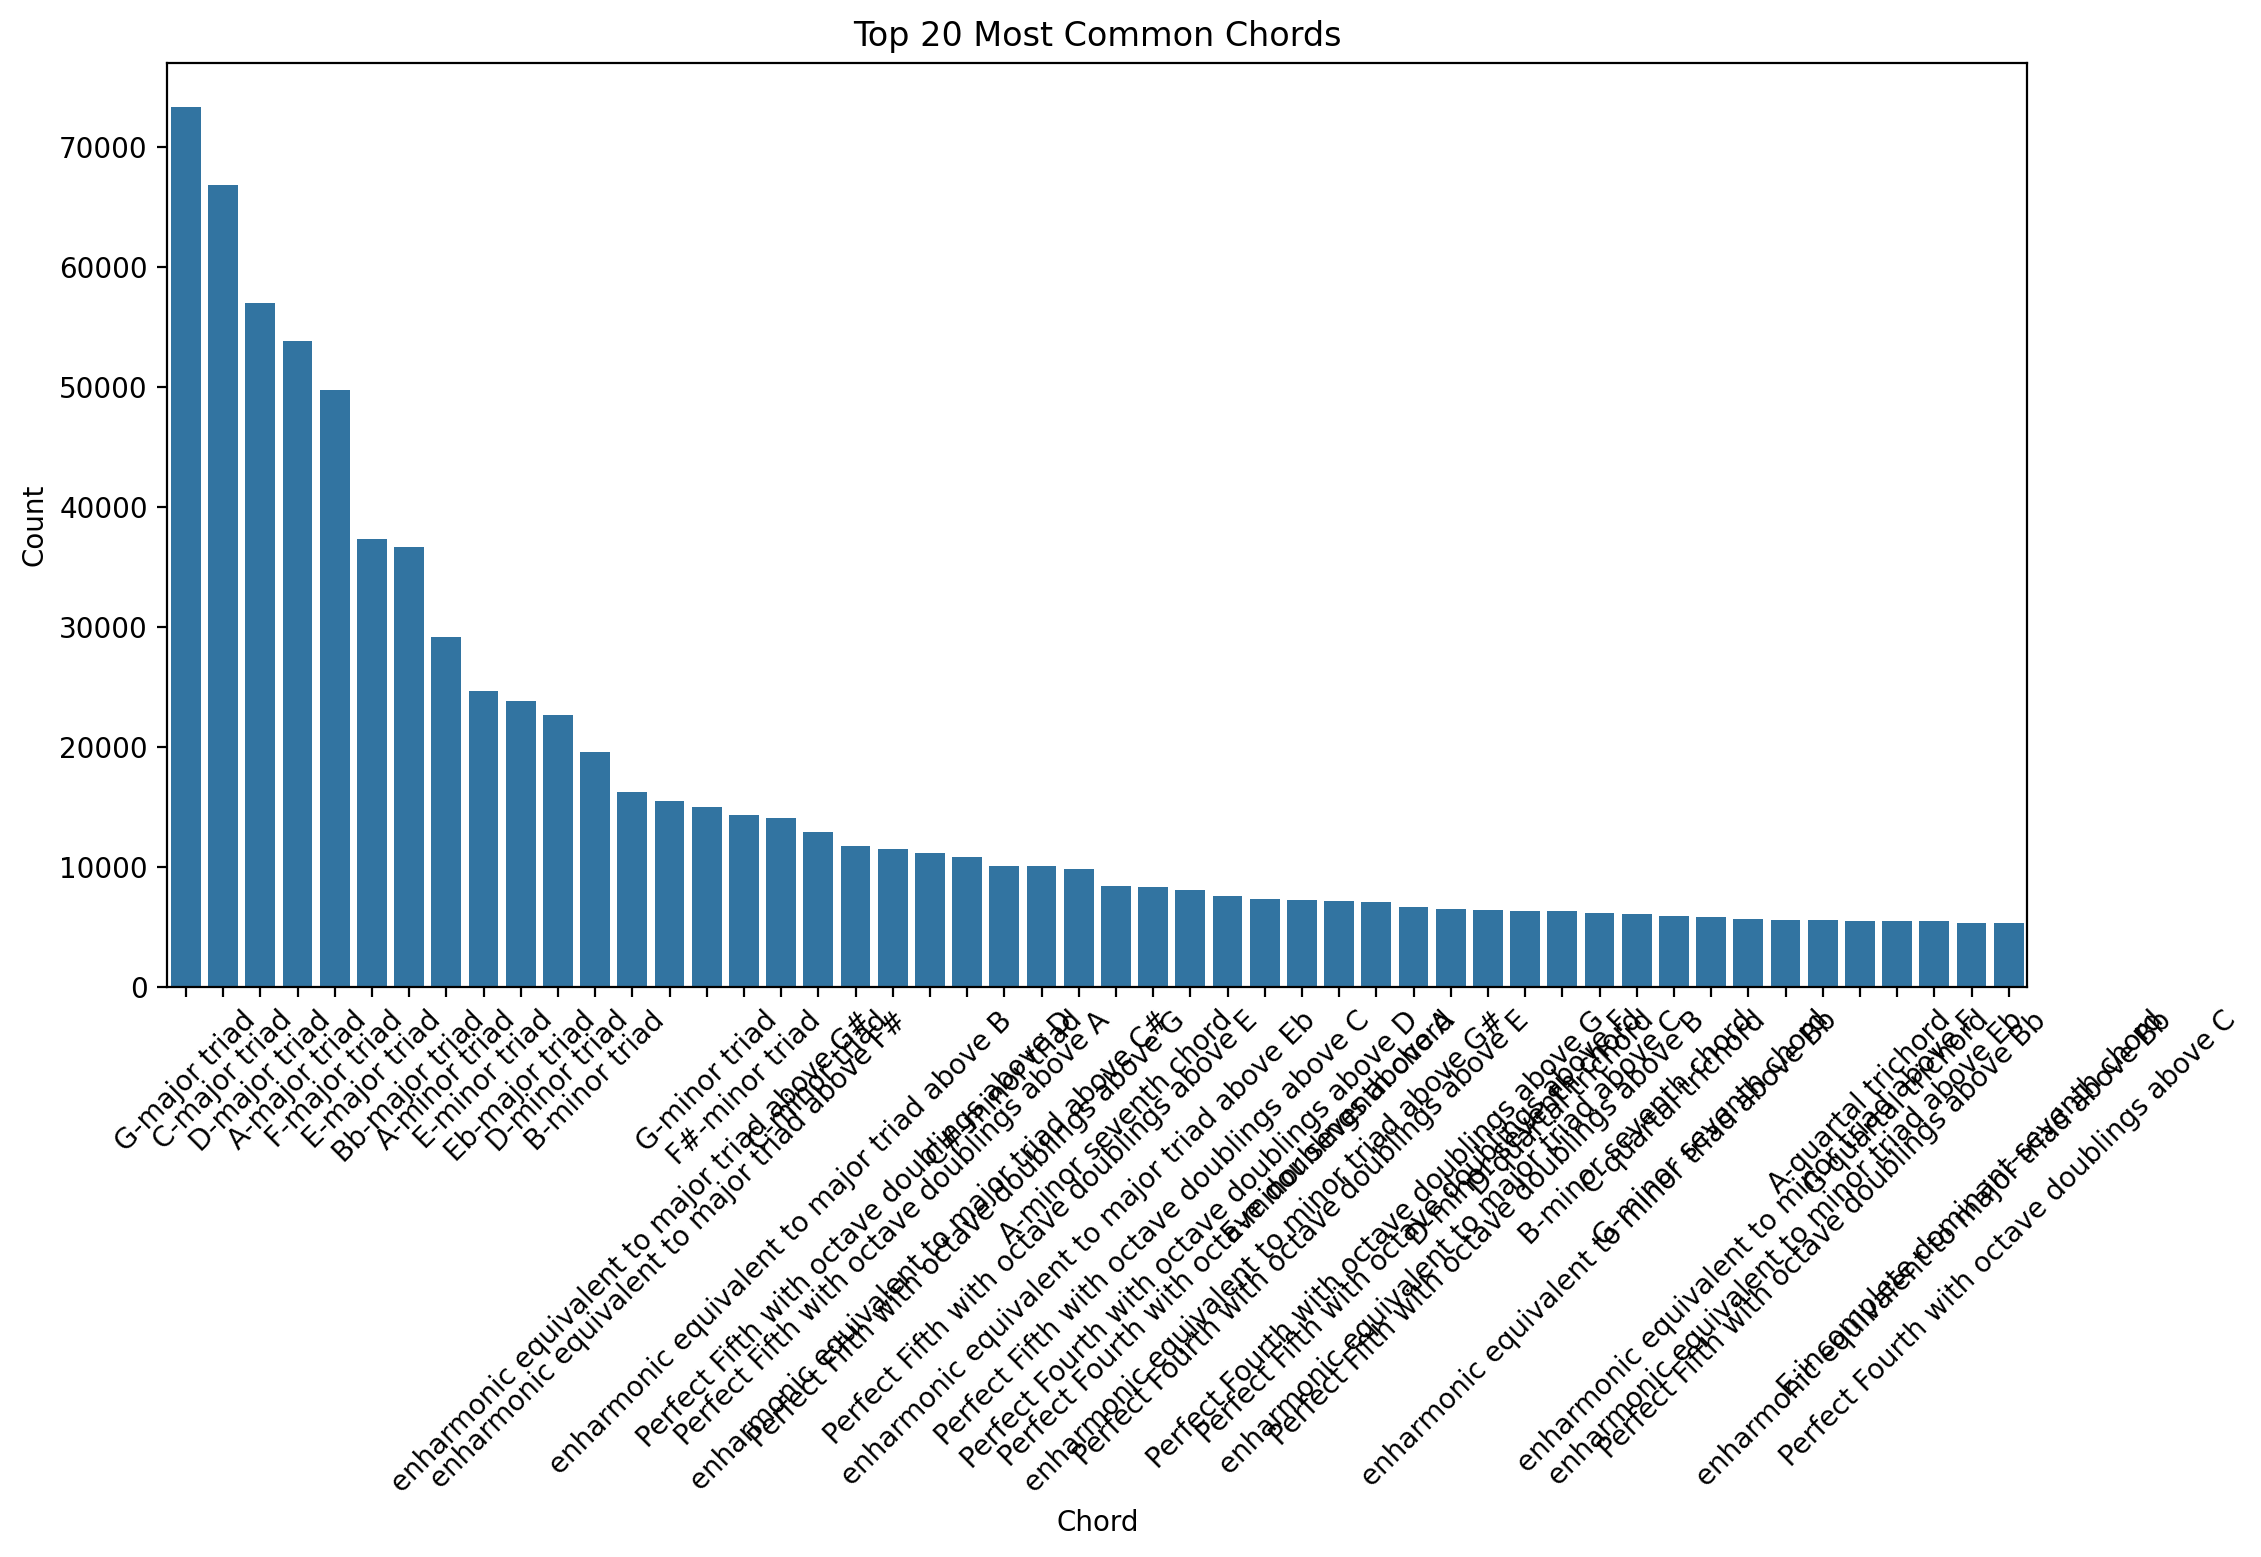

In [6]:
plt.figure(figsize=(12, 6))
sns.barplot(x=chord_counts.head(50).index, y=chord_counts.head(50).values)
plt.xticks(rotation=45)
plt.xlabel("Chord")
plt.ylabel("Count")
plt.title("Top 20 Most Common Chords")
plt.show()

[(('G-major triad', 'C-major triad'), 11402), (('C-major triad', 'G-major triad'), 11169), (('G-major triad', 'D-major triad'), 9208), (('F-major triad', 'C-major triad'), 9017), (('D-major triad', 'A-major triad'), 8658), (('D-major triad', 'G-major triad'), 8656), (('C-major triad', 'F-major triad'), 8479), (('A-major triad', 'D-major triad'), 7981), (('A-major triad', 'E-major triad'), 6789), (('E-major triad', 'A-major triad'), 6785), (('F-major triad', 'G-major triad'), 6092), (('C-major triad', 'D-major triad'), 5232), (('G-major triad', 'F-major triad'), 5113), (('G-major triad', 'A-major triad'), 5065), (('Bb-major triad', 'F-major triad'), 4833), (('G-major triad', 'A-minor triad'), 4727), (('A-minor triad', 'G-major triad'), 4701), (('F-major triad', 'Bb-major triad'), 4338), (('A-major triad', 'G-major triad'), 4120), (('Eb-major triad', 'Bb-major triad'), 3967)]


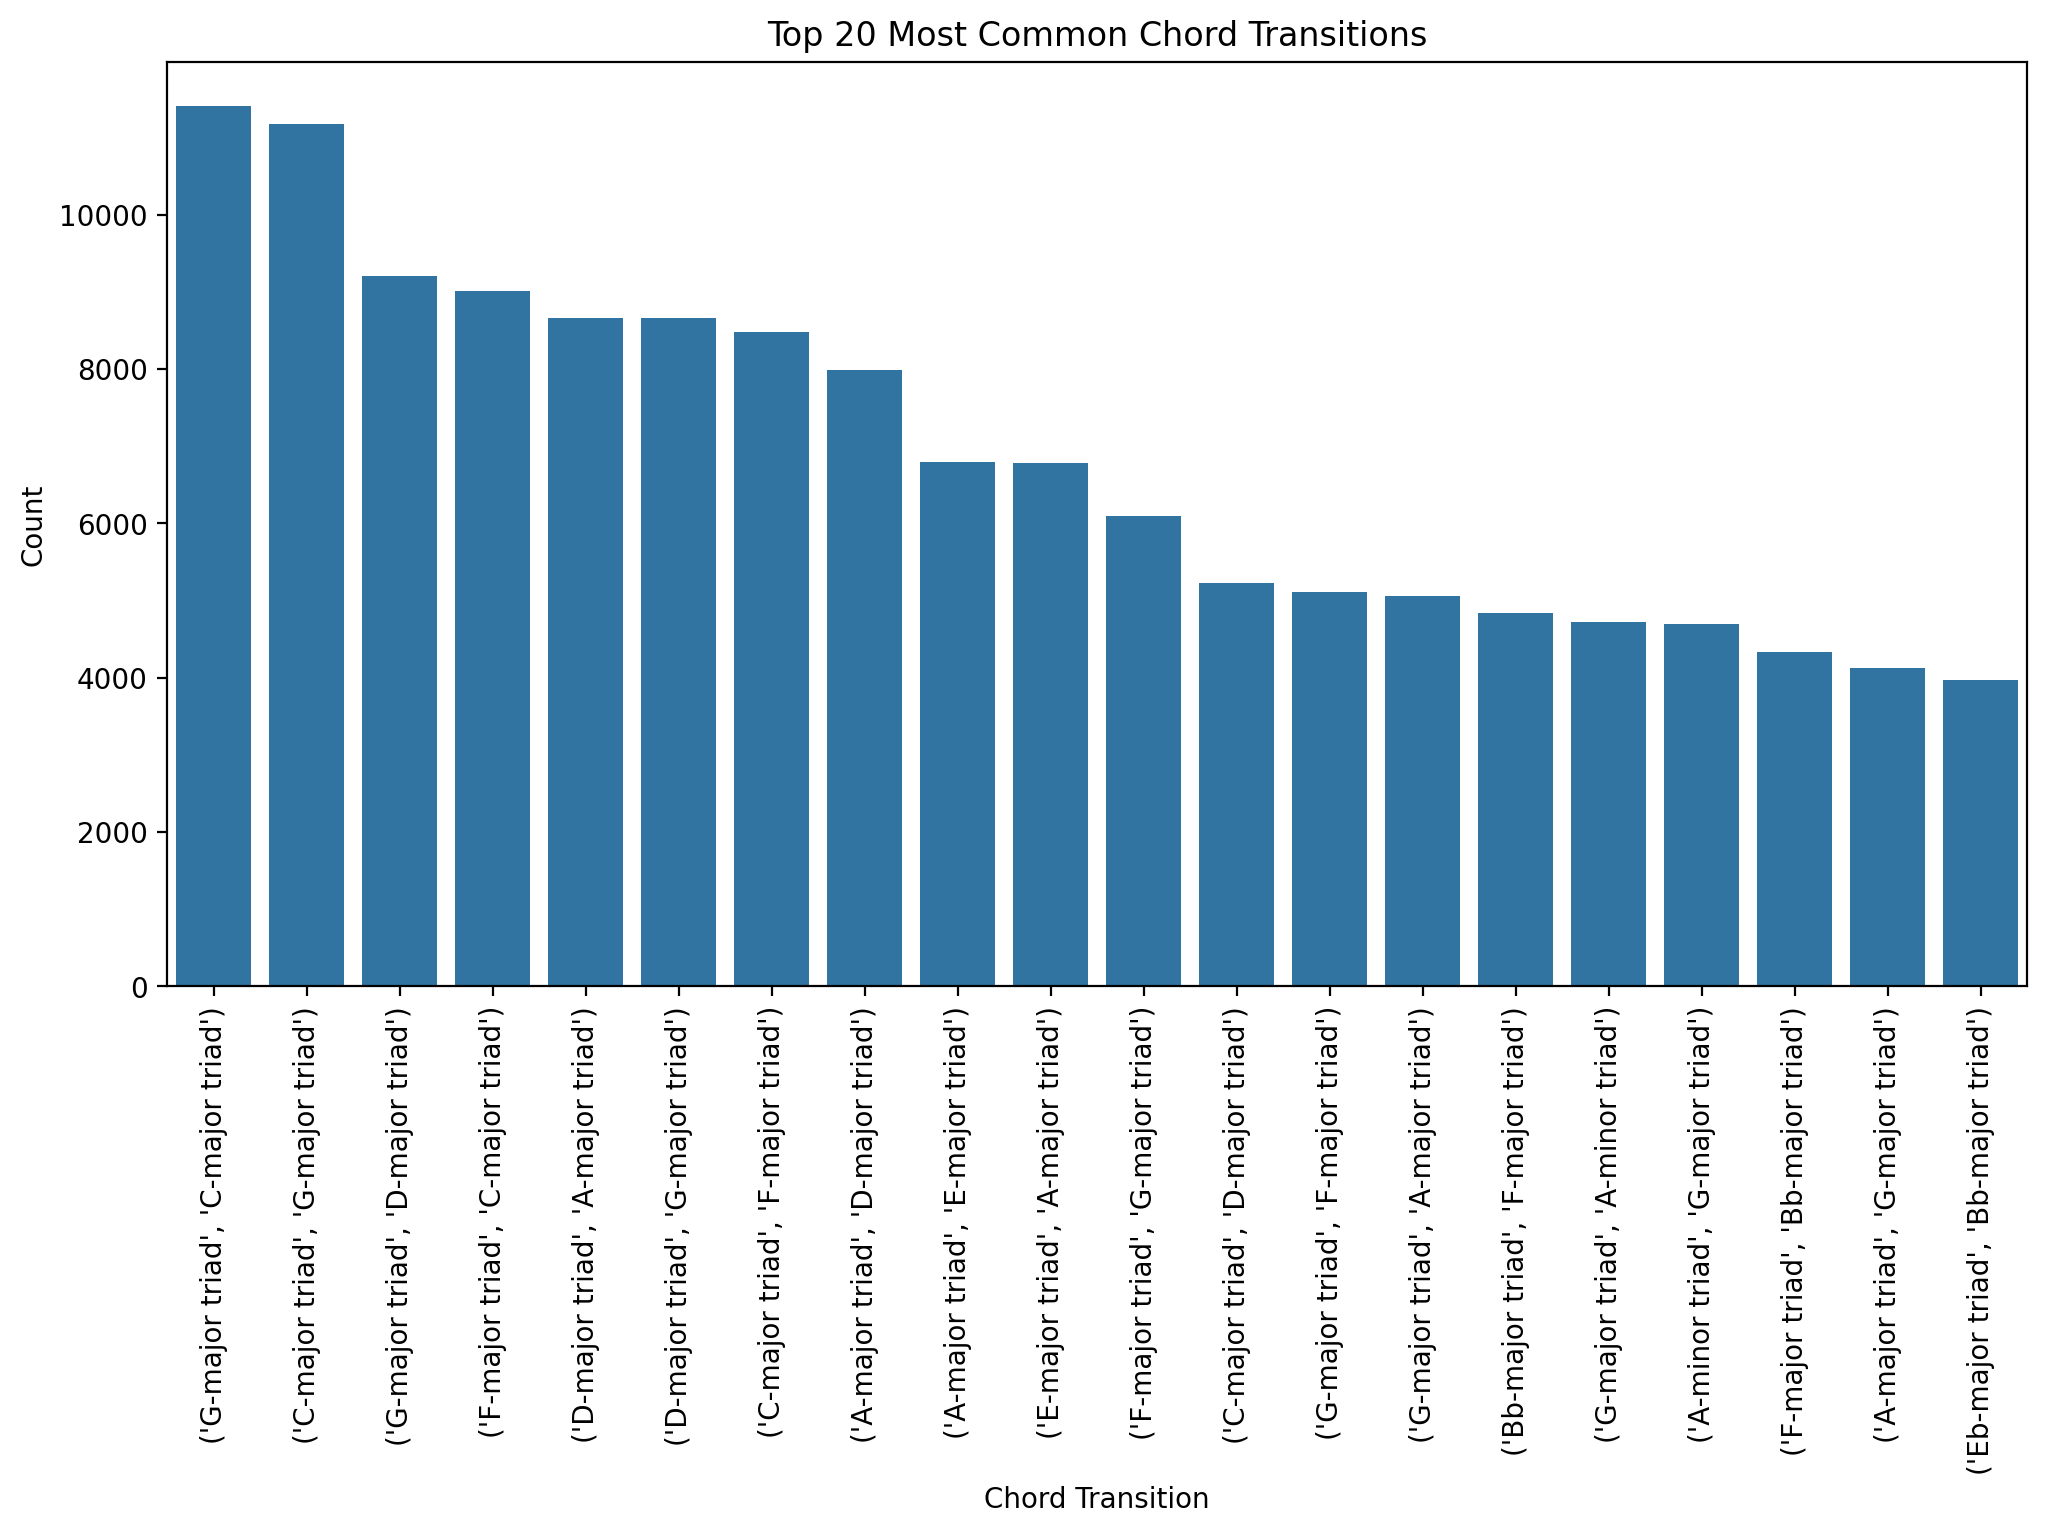

In [7]:
from collections import Counter

bigrams = list(zip(chords[:-1], chords[1:]))  # Consecutive chord pairs
bigram_counts = Counter(bigrams)

# Top 20 most common transitions
print(bigram_counts.most_common(20))

# Convert to DataFrame for visualization
bigram_df = pd.DataFrame(bigram_counts.most_common(20), columns=['Bigram', 'Count'])

plt.figure(figsize=(12, 6))
sns.barplot(x=bigram_df['Bigram'].astype(str), y=bigram_df['Count'])
plt.xticks(rotation=90)
plt.xlabel("Chord Transition")
plt.ylabel("Count")
plt.title("Top 20 Most Common Chord Transitions")
plt.show()

# Start Here

In [8]:
# Load JSON data
with open("../App/backend/chords_data.json", "r") as f:
    chords = json.load(f)
    print([c for c in chords[:3]])

FileNotFoundError: [Errno 2] No such file or directory: '../App/backend/chords_data.json'

In [20]:
pitches = [list(c.values())[0] for c in chords]
chords = [list(c.keys())[0] for c in chords]

In [21]:
# Encode chords to numerical values
encoder = LabelEncoder()
chords_encoded = encoder.fit_transform(chords)

In [22]:
# Prepare sequences of four chords (4-grams), last chord is target value
sequence_length = 4
X, y = [], []

for i in range(len(chords_encoded) - sequence_length):
    X.append(chords_encoded[i:i+sequence_length])
    y.append(chords_encoded[i+sequence_length])

X = np.array(X)
y = np.array(y)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
checkpoint_callback = ModelCheckpoint(
    filepath='./model_checkpoints/checkpoint-{epoch:02d}.h5',  # Save format
    monitor = 'val_loss',
    save_freq = 'epoch',
    verbose=1  # Prints a message when saving
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-5
)

In [24]:
# Build LSTM Model
model = Sequential([
    Embedding(input_dim=len(set(chords_encoded)), output_dim=128, mask_zero=True),
    Bidirectional(LSTM(256, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)),
    LSTM(128, return_sequences=True),
    LSTM(128),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(len(set(chords_encoded)), activation='softmax')
])

optimizer = Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [31]:
# Train the model
model.fit(X_train, y_train, epochs=7, batch_size=32, validation_data=(X_val, y_val),
          callbacks=[checkpoint_callback, early_stopping, lr_scheduler])

# Running Epoch 9

Epoch 1/7
37475/37475 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.2842 - loss: 3.6346
Epoch 1: saving model to ./model_checkpoints/checkpoint-01.h5


37475/37475 ━━━━━━━━━━━━━━━━━━━━ 1812s 48ms/step - accuracy: 0.2842 - loss: 3.6346 - val_accuracy: 0.2912 - val_loss: 3.6308 - learning_rate: 0.0010
Epoch 2/7
37474/37475 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.2858 - loss: 3.6290

KeyboardInterrupt: 

In [32]:
model.save("./model_checkpoints/checkpoint-3.h5")

In [33]:
np.save("./App/encoder_classes2.npy", encoder.classes_)

In [29]:
def sample_with_temperature_and_penalty(predictions, temperature, history, penalty):
    """
    Applies temperature sampling and penalizes recently played chords.
    
    - `predictions`: Raw logits from model output.
    - `temperature`: Controls randomness (higher = more diverse).
    - `history`: List of recent chords to penalize.
    - `penalty`: Multiplier applied to probabilities of recent chords (0.0-1.0).
    """
    predictions = np.asarray(predictions).astype("float64")

    # Apply temperature scaling
    predictions = np.log(predictions + 1e-8) / temperature  
    exp_preds = np.exp(predictions)
    probabilities = (exp_preds / np.sum(exp_preds))[0]

    # Apply penalty to recently played chords
    for recent_chord in history:
        probabilities[recent_chord] *= penalty  

    # Renormalize probabilities to sum to 1
    probabilities /= np.sum(probabilities)

    return np.random.choice(len(probabilities), p=probabilities)

In [30]:
# Generate a chord sequence
def generate_chord_sequence(seed_sequence, num_chords=8, temperature=2.0, window_size=4, penalty=2.0):
    generated_chords = seed_sequence[:]
    for _ in range(num_chords):
        input_seq = np.array(generated_chords[-sequence_length:]).reshape(1, -1)
        prediction = model.predict(input_seq, verbose=0)

        history = generated_chords[-window_size:] if window_size > 0 else []
        next_chord = sample_with_temperature_and_penalty(prediction, temperature, history, penalty)
        generated_chords = np.append(generated_chords, next_chord)
    
    return encoder.inverse_transform(generated_chords)

In [31]:
seed = chords_encoded[0:1]  # Use first four chords as seed
print(encoder.inverse_transform(seed))
generated_chords = generate_chord_sequence(seed)
print("\nGenerated Chord Sequence:", generated_chords)

['Perfect Fourth above B']

Generated Chord Sequence: ['Perfect Fourth above B' 'E' 'G#-diminished triad' 'E-quartal trichord'
 'Major Second above A' 'Major Sixth above B' 'Major Third above D'
 'Minor Third above G#' 'Major Third above A']
